
<h1>Classification of Boston Houses using Decision Trees</h1>

---
This problem set has 4 parts: 


1.   <a href='#Part1'>Creating Helper Functions</a>
2.   <a href='#Part2'>Building Trees</a>
3.   <a href='#Part3'>Making Predictions</a>
4.   <a href='#Part4'>Comparing to out-of-the-box classifiers</a>








In [ ]:
#import libraries
import math #for entropy calculation
import pandas as pd
import numpy as np
from random import choices

from sklearn import tree # for decision tree
from sklearn.datasets import load_boston #for loading dataset
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import graphviz #for visualization of tree
import matplotlib.pyplot as plt
%matplotlib inline


---

<a id='Part1'></a>
# Section 1: Creating Helper Functions 

---


Creating three helper functions to calculate:


1.   Gini Impurity
2.   Entropy
3.   Weighted Sum


---





#### 1. **calcGini:** Helper function to calculate Gini impurity


---












> *Input parameters:* Count of each class (assume only two classes for this problem set)

> *Output:* Gini Impurity


In [ ]:
def calcGini(count_A, count_B):
  prob_A = count_A / (count_A + count_B)
  prob_B = 1 - prob_A

  #calculate gini impurity 
  gini = 1 - prob_A ** 2 - prob_B ** 2
  return gini

#### 2. **calcEntropy**: Helper function to calculate Entropy

---





> Input parameters: Count of each class (assume only two classes for this problem set)

> Output: Entropy

In [ ]:
def calcEntropy(count_A, count_B):
  prob_A = count_A / (count_A + count_B)
  prob_B = 1 - prob_A

  #calculate entropy 
  try:
    entropy = - (prob_A * math.log (prob_A, 2) + prob_B * math.log (prob_B, 2))
  except (ValueError):
    entropy = 0
  return entropy

#### 3. **weightedSum:** Helper function to calculate Gini impurity

---





> Input parameters: List of values and counts

> Output: Weighted Sum of values

In [ ]:
def weightedSum(values, weights):
  
  weighted_sum = 0
  for i in range(len(values)):
    weighted_sum += values[i] * weights[i]
  return weighted_sum

#### 4. Verify that your functions are working as expected

---


We first import the toyData into a pandas Dataframe

In [ ]:
#importing toy data set 
toy_data = pd.read_csv("toyData.csv")
toy_data

,Variable A,Variable B,Variable C,Output
0,Yes,On,High,Red
1,No,Off,Low,Blue
2,Yes,On,High,Red
3,Yes,Off,High,Red
4,No,On,High,Blue
5,Yes,On,Low,Blue
6,No,Off,High,Blue
7,No,On,High,Blue
8,Yes,On,Low,Blue
9,Yes,Off,High,Red


As can be observed all the columns have two unique values, thus our helper functions which were built with the assumption of binary class can be used for each of the column.

In [ ]:
#get subset 
def subset(df, col, val):
  return df.loc[df[col] == val]

def getColumnCount(df, col, col_unique):
  count_1, count_2 = 0, 0
  k = 0
  for i in col_unique:
    if i in set(df[col]):
      count = (df[col] == i).sum()
      if k == 0:
        count_1 = count
      elif k == 1:
        count_2 = count
    k += 1
  return count_1, count_2
      
#get count of target within a particular coolumn
#use subset of dataframe
def getGiniTotal(df, col, col_unique, target, target_unique):
  #get count of columns

  count_1, count_2 = getColumnCount(df, col, col_unique)
  gini_col = []
  prob_1 = count_1 / (count_1 + count_2)
  weight = [prob_1, 1 - prob_1] 
  for v in col_unique:
    #get subset of the df
    sub_df = subset(df, col, v)
    count_a, count_b = getColumnCount(sub_df, target, target_unique)
    gini_col.append(round(calcGini(count_a, count_b), 6))
  gini = round(weightedSum(gini_col, weight),6)
  return gini_col, gini

def getEntropyTotal(df, col, col_unique, target, target_unique):
  #get count of columns
  #get unique columns 
  
  count_1, count_2 = getColumnCount(df, col, col_unique)
  entropy_col = []
  prob_1 = count_1 / (count_1 + count_2)
  weight = [prob_1, 1 - prob_1] 
  for v in col_unique:
    #get subset of the df
    sub_df = subset(df, col, v)
    count_a, count_b = getColumnCount(sub_df, target, target_unique)
    entropy_col.append(round(calcEntropy(count_a, count_b), 6))
  entropy = round(weightedSum(entropy_col, weight),6)
  return entropy_col, entropy

To find gini impurity of each column in toyData

In [ ]:
#find gini impurity for all columns
for col in toy_data.columns[:3]:
  target = "Output"
  var_col = toy_data[col].unique()
  var_target = toy_data[target].unique()
  gini_col, gini = getGiniTotal(toy_data, col, var_col, target, var_target)
  print("\nFor ", col, ":\nColumn Value\t", var_col[0], "\t", var_col[1], "\nGini Impurity\t%.2f" % gini_col[0], "\t%.2f"% gini_col[1], "\nTotal Gini Impurity: ", round(gini, 2))
 


For  Variable A :
Column Value	 Yes 	 No 
Gini Impurity	0.44 	0.00 
Total Gini Impurity:  0.27

For  Variable B :
Column Value	 On 	 Off 
Gini Impurity	0.44 	0.50 
Total Gini Impurity:  0.47

For  Variable C :
Column Value	 High 	 Low 
Gini Impurity	0.49 	0.00 
Total Gini Impurity:  0.34


To now find the entropy of each column in toyData



In [ ]:
for col in toy_data.columns[:3]:
  target = "Output"
  var_col = toy_data[col].unique()
  var_target = toy_data[target].unique()
  entropy_col, entropy = getEntropyTotal(toy_data, col, var_col, target, var_target)
  print("\nFor ", col, ":\nColumn Value\t", var_col[0], "\t", var_col[1], "\nEntropy\t\t%.2f" % entropy_col[0], "\t%.2f"% entropy_col[1], "\nTotal Entropy: ", round(entropy,2))
 


For  Variable A :
Column Value	 Yes 	 No 
Entropy		0.92 	0.00 
Total Entropy:  0.55

For  Variable B :
Column Value	 On 	 Off 
Entropy		0.92 	1.00 
Total Entropy:  0.95

For  Variable C :
Column Value	 High 	 Low 
Entropy		0.99 	0.00 
Total Entropy:  0.69


As can be cross-checked, the toyData entropy and gini impurity value is same as that calculated in lecture.


---

<a id='Part2'></a>
# Section 2: Building Trees


---


#### 5. Import the Boston using dataset using sklearn.datasets

---



In [ ]:
boston = load_boston()

#convert to dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['MEDV'] = pd.Series(boston.target)

#create a new response variable using MEDV > 35K
boston_df['highPriced'] = [True if value > 35.0 else False for value in boston_df['MEDV']]

In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,highPriced
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,False
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,False
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,False
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,False
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,True


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

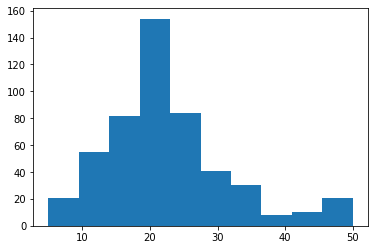

In [ ]:
plt.hist(boston_df.MEDV)

As can be observed from the histogram of MEDV, we observe that before 35k the median price of households are fairly normally distributed and only after that does it deviate. Thus, I believe that the split at 35k captures high priced or not adequately. Additionally, as one would expect the highPriced homes should constitute a lesser number compared to well or low priced. This is reflected in the count below.

In [ ]:
boston_df.highPriced.value_counts()

False    458
True      48
Name: highPriced, dtype: int64

#### 6. Using your helper functions & with highPriced as your output, find what the best split is along the AGE variable using each of Gini impurity and entropy as the splitting criterion

---

In [ ]:
#function to get the axis-aligned splits between every pair of data points
def getMean(df, col):
  sort_col = sorted(df[col].unique())
  mean = []
  for i in range(len(sort_col) - 1):
    mean.append(round(((sort_col[i] + sort_col[i+1])/2), 3))
  return mean

In [ ]:
#to find the optimal split based on either entropy or gini impurity
def getBestSplit(df, col, target):
  var_col = [0,1]
  var_target = [False, True]
  bool_df = pd.DataFrame()
  bool_df[target] = pd.Series(df[target])
  minGini = 2
  minEntropy = 2
  mean = getMean(df, col)
  g_split, e_split = mean[0], mean[0]
  for m in mean:
    bool_df[col] = [1 if value >= m else 0 for value in df[col]]
    bool_df.head()
    _, currentgini = getGiniTotal(bool_df, col, var_col, target, var_target)
    _, currentEntropy = getEntropyTotal(bool_df, col, var_col, target, var_target)
    if currentgini < minGini:
      minGini = currentgini
      g_split = m
    if currentEntropy < minEntropy:
      minEntropy = currentEntropy
      e_split = m
  print("The optimal split for ", col, " based on\n",minEntropy, " entropy is @ split ", \
        e_split, "\n",minGini, " Gini Impurity is @ split",   g_split)
  return e_split, minEntropy, g_split, minGini
 

In [ ]:
#for age 
getBestSplit(boston_df.loc[:, ["AGE", "highPriced"]], "AGE", "highPriced")
#for crim
getBestSplit(boston_df.loc[:, ["CRIM", "highPriced"]], "CRIM", "highPriced")

The optimal split for  AGE  based on
 0.446827  entropy is @ split  37.25 
 0.170228  Gini Impurity is @ split 37.25
The optimal split for  CRIM  based on
 0.432977  entropy is @ split  9.281 
 0.168571  Gini Impurity is @ split 0.022


(9.281, 0.432977, 0.022, 0.168571)

The optimal split for AGE remains the same i.e. 37.25 for both gini impurity and entropy. However, this is not the case for CRIM where the split points are widely different depending on the impurity factor. 

#### 7. Import sklearn's DecisionTreeClassifier & find what the optimal split is along the AGE variable using entropy

---

In [ ]:
#select x - predictor ; y -target
x = pd.DataFrame(boston_df.loc[:, ["AGE"]])
y = pd.DataFrame(boston_df.loc[:, 'highPriced'])

#fit tree using x and y and limit depth to 1 and using entropy as an impurity factor
age_model = tree.DecisionTreeClassifier(max_depth = 1, criterion= 'entropy')
age_model.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#function to display tree
def display_tree(dot_file):
  with open(dot_file) as f:
    dot_graph = f.read()
  return graphviz.Source(dot_graph)

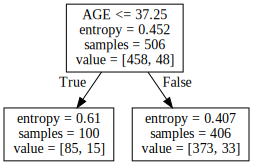

In [ ]:
tree.export_graphviz(age_model, out_file='age.dot', feature_names=x.columns)
display_tree("age.dot")

The optimal split value for AGE variable given by sklearn's DecisionTreeClassifier is the same as the one calculated in Q. 6 by using the helper functions.

#### 8. Using the RM, LSTAT, and RAD variables, build a decision tree with 2 levels ( 3 split points, 4 leaf nodes) based on entropy.


---



In [ ]:
#create subset of database containing RM, LSTAT, RAD, highPriced
scratch_df = boston_df.loc[:, ['RM', 'LSTAT', "RAD", "highPriced"]]

#create an empmty dataframe with columns - level, col, threshold to store the tree
scratch_tree = pd.DataFrame(columns = ['level', 'col', 'threshold'])

In [ ]:
#function to find the column with lowest entropy and its split/threshold
def bestSplitLevel(columns, threshold, entropy):
  i = entropy.index(min(entropy))
  return( columns[i], threshold[i])

#to find split for a node
def getSplit(df,columns, custom_tree, level):
  e_values = []
  e_threshold = []
  for col in columns:
    e_split, entropy, _, _ = getBestSplit(df, col, "highPriced")
    e_values.append(entropy)
    e_threshold.append(e_split)
  #find bestSplit for node
  column, threshold = bestSplitLevel(columns, e_threshold, e_values)
  rows = pd.DataFrame([[level, column, threshold]], columns=['level','col','threshold'])
  custom_tree = pd.concat([custom_tree, rows], ignore_index= True)
  return custom_tree

In [ ]:
def twoLevelTree(df, columns, tree):
  #first split 
  tree = getSplit(df, columns, tree, 1)
  #subset data based on level 1 split
  left_df = df.loc[df[tree.loc[0, 'col']] < tree.loc[0, 'threshold']]
  right_df =  df.loc[df[tree.loc[0, 'col']] >= tree.loc[0, 'threshold']]
  tree = getSplit(left_df, columns, tree, 2)
  tree = getSplit(right_df, columns, tree, 2)
  return tree

In [ ]:
scratch_tree = twoLevelTree(scratch_df, ['RM', "LSTAT", "RAD"], scratch_tree)

The optimal split for  RM  based on
 0.239064  entropy is @ split  6.941 
 0.075922  Gini Impurity is @ split 7.437
The optimal split for  LSTAT  based on
 0.288778  entropy is @ split  5.155 
 0.111971  Gini Impurity is @ split 5.155
The optimal split for  RAD  based on
 0.441105  entropy is @ split  16.0 
 0.169434  Gini Impurity is @ split 16.0
The optimal split for  RM  based on
 0.101172  entropy is @ split  6.68 
 0.027228  Gini Impurity is @ split 6.68
The optimal split for  LSTAT  based on
 0.082353  entropy is @ split  9.535 
 0.024631  Gini Impurity is @ split 3.745
The optimal split for  RAD  based on
 0.099819  entropy is @ split  16.0 
 0.027251  Gini Impurity is @ split 16.0
The optimal split for  RM  based on
 0.603137  entropy is @ split  7.437 
 0.270862  Gini Impurity is @ split 7.437
The optimal split for  LSTAT  based on
 0.809759  entropy is @ split  5.185 
 0.374207  Gini Impurity is @ split 5.185
The optimal split for  RAD  based on
 0.939004  entropy is @ split 

In [ ]:
scratch_tree.head()

,level,col,threshold
0,1,RM,6.941
1,2,LSTAT,9.535
2,2,RM,7.437


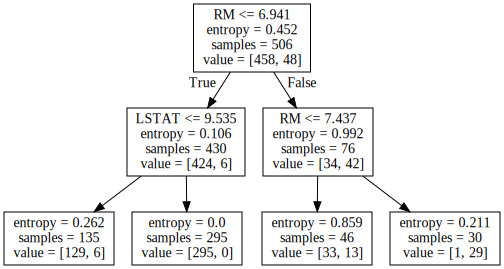

In [ ]:
#check for decision tree using sklearn
#use decisionTreeClassifier to find optimal split 
scratch_model = tree.DecisionTreeClassifier(max_depth = 2, criterion= 'entropy')
scratch_model.fit(scratch_df.loc[:, ['RM', "LSTAT", "RAD"]], (scratch_df.loc[:, "highPriced"]))
tree.export_graphviz(scratch_model, out_file='custom1.dot', feature_names= (scratch_df.loc[:, ['RM', "LSTAT", "RAD"]]).columns)
display_tree("custom1.dot")

The decision tree built using the custome function is shown in the table above. The decision tree depicted above was built using the sklearn's DecisionTreeClassifier package. 

It can be observed that the splits identified by the custom functions are exactly at the same place as those produced by the sklearn's package. This was a sanity check performed. 

#### 9. Visualize your splits on an X-Y plane

---



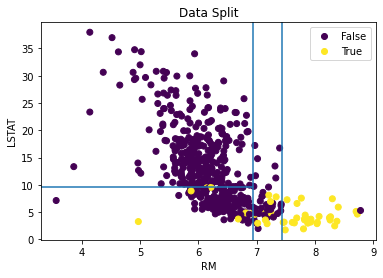

In [ ]:
classes = ['False', 'True']
scatter = plt.scatter(boston_df.RM, boston_df.LSTAT,c = boston_df.highPriced)
plt.title("Data Split")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.axvline(x=6.941)
plt.axvline(x=7.437)
plt.axhline(y=9.535, xmax = 0.63)
plt.xlabel('RM')
plt.ylabel('LSTAT')
plt.show()

The lines here represent the split as were identified using the helper function for the above tree. The vertical split are for RM and horizontal for values of LSTAT. This divides the X-Y plane into 4 parts as is expected as there are four leaf nodes which are produced. 

As can be observed from the visualization above, the top left rectangle has only False values whereas the extreme right rectangle has only True values. The remaining two rectangles have a mix of False and True values for highPriced columns.


---

<a id='Part3'></a>
# Section 3: Making Predictions


---



#### 10. Create a training/test split for your data

---


In [ ]:
#filter by 5 
test_df = boston_df[boston_df.index % 5 == 0]
train_df = boston_df.append(test_df).drop_duplicates(keep=False)
row_train = train_df.shape[0]
row_test = test_df.shape[0]
print("The number of observations in:\nTrain Dataset: ", row_train , "\nTest Dataset: ", row_test)

The number of observations in:
Train Dataset:  404 
Test Dataset:  102


In [ ]:
#x - feature labels - RM, LSTAT, 
x_train = pd.DataFrame(train_df.loc[:, ['RM', 'LSTAT']])
x_test = pd.DataFrame(test_df.loc[:, ['RM', 'LSTAT']])

#y - target label
y_train = pd.DataFrame(train_df.loc[:, 'highPriced'])
y_test = pd.DataFrame(test_df.loc[:, 'highPriced'])


Target variable - highPriced distribution using histogram.


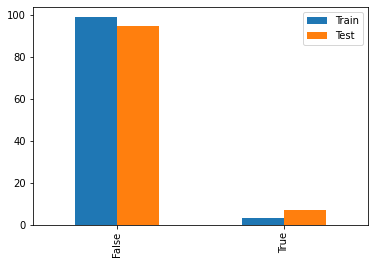

In [ ]:
Y = [train_df.iloc[:, -1].tolist(), test_df.iloc[:, -1].tolist()]
df = pd.DataFrame(list(zip(*Y)), columns=['Train', 'Test'])
df.apply(pd.value_counts).plot.bar()

The target variable - highPriced has almost the same distribution of values in both training and test dataset as observed from the histogram.

#### 11. Create a baseline set of predictions

---


In [ ]:
#get predictions by sampling 404 training rows with replacement to get test predictions for 102 rows
baseline = choices(y_train['highPriced'].values.tolist(), k = row_test)

In [ ]:
base_accuracy = accuracy_score(y_test, baseline)
print('Baseline prediction accuracy: {:.2f}'.format(base_accuracy)) 

Baseline prediction accuracy: 0.87


The baseline prediction gives an accuracy of 87% this might be attributed to the resampling method which was employed.

#### 12. Now, use a 2-level decision tree to make predictions

---


In [ ]:
#create an empmty dataframe with columns - level, col, threshold to store the tree
train_tree = pd.DataFrame(columns = ['level', 'col', 'threshold'])
train_tree = twoLevelTree(train_df.loc[:, ["RM", "LSTAT", 'highPriced']], ['RM', "LSTAT"], train_tree)

The optimal split for  RM  based on
 0.251054  entropy is @ split  7.127 
 0.080615  Gini Impurity is @ split 7.437
The optimal split for  LSTAT  based on
 0.307043  entropy is @ split  5.155 
 0.116821  Gini Impurity is @ split 4.265
The optimal split for  RM  based on
 0.150378  entropy is @ split  6.678 
 0.046732  Gini Impurity is @ split 6.941
The optimal split for  LSTAT  based on
 0.126534  entropy is @ split  5.115 
 0.042679  Gini Impurity is @ split 5.115
The optimal split for  RM  based on
 0.539052  entropy is @ split  7.437 
 0.239632  Gini Impurity is @ split 7.437
The optimal split for  LSTAT  based on
 0.586375  entropy is @ split  3.99 
 0.293076  Gini Impurity is @ split 3.99


In [ ]:
train_tree.head()

,level,col,threshold
0,1,RM,7.127
1,2,LSTAT,5.115
2,2,RM,7.437


The above dataframe shows the two-level tree created using predictors - RM, LSTAT which was trained on the training data. The function below predicts value for test dataset.

In [ ]:
import random
#make predictions
def predict(train_df, test_df):
  node_1, node_2, node_3, node_4 = [], [], [], []
  for _, r in train_df.iterrows():
    #find samples belonging to nodes 
    if r.RM < 7.127:
      if r.LSTAT < 5.115:
        node_1.append(r.highPriced)
      else:
        node_2.append(r.highPriced)
    else:
      if r.RM < 7.437:
        node_3.append(r.highPriced)
      else:
        node_4.append(r.highPriced)
      
  predict = []
  for _, r in test_df.iterrows():
    #sample to predict
    if r.RM < 7.127:
      if r.LSTAT < 5.115:
        predict.append(random.choice(node_1))
      else:
        predict.append(random.choice(node_2))
    else:
      if r.RM < 7.437:
        predict.append(random.choice(node_3))
      else:
        predict.append(random.choice(node_4))
  return predict

In [ ]:
predict_y = predict(train_df, test_df)
tree_accuracy = accuracy_score(y_test, predict_y)
print('Test set accuracy for tree trained on training data using helper functions: {:.2f}'.format(tree_accuracy)) 

Test set accuracy for tree trained on training data using helper functions: 0.93


The accuracy of this tree generated using the helper function is 93%. This is higher compared to the baseline prediction's accuracy of 87%. This tree is also different than the one which was trained using the whole dataset as will be expected. While the split nodes remain the same in terms of columns, the value is different. 



---


<a id='Part4'></a>
# Section 4: Comparing to out-of-the-box classifiers


---


#### 13. Use sklearn’s DecisionTreeClassifier to recreate the decision tree that is trained on the training data.



---


In [ ]:
model_1 = tree.DecisionTreeClassifier(max_depth = 2, criterion='entropy')
model_1.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

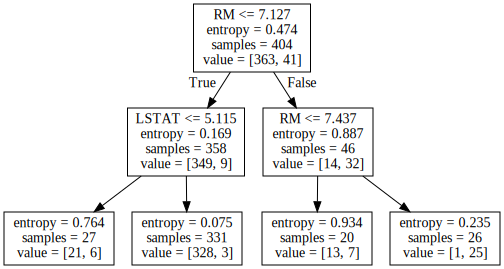

In [ ]:
tree.export_graphviz(model_1, out_file='tree_1.dot', feature_names=x_train.columns)
display_tree("tree_1.dot")

In [ ]:
y_pred = model_1.predict(x_test)
print("Test set accuracy for sklearn Decision Tree: {:.4f}".format(accuracy_score(y_test, y_pred)))

Test set accuracy for sklearn Decision Tree: 0.9706


The decision tree built using sklearn's package gives the same split points as the tree formed in Part 12 by using the custom helper functions. Thus, the splits are at the same location and the probabilities are similiar as in the tree in Part 12.

The prediction accuracy for this tree is 97.06% which is higher than both the tree in Part 12 and the baseline predictions which had accuracy of 93% and 88% respectively.

#### 14. Use sklearn’s BaggingClassifier to create a bagging classifier whose base is a DecisionTreeClassifier with 2 levels and entropy as the split criterion.


---


In [ ]:
dt = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
bc = BaggingClassifier(base_estimator=dt, n_estimators=100)
bc.fit(x_train, y_train)
y_pred_bc = bc.predict(x_test)
acc_test = accuracy_score(y_test, y_pred_bc)
print('Test set accuracy for sklearn Bagged Tree: {:.4f}'.format(acc_test)) 

Test set accuracy for sklearn Bagged Tree: 0.9706


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The prediction accuracy for bagged decision tree is 97.06% which is higher than both the tree in Part 12 and the baseline predictions which had accuracy of 93% and 88% respectively. However, it has the same accuracy as the basic decision tree of Part 13. It is possible that due to the class imbalance, there isn't a lot of variance to deal with. Thus, there was no marked difference in the accuracy by bagging the decision tree.

#### 15. Use sklearn’s RandomForestClassifier to create a random forest classifier whose base is a decision tree with 2 levels and entropy as the split criterion.


---


In [ ]:
rf = RandomForestClassifier(n_estimators=100,
            random_state=4, criterion = 'entropy', max_depth = 2)
rf.fit(x_train, y_train) 

y_pred_rf = rf.predict(x_test)
acc_test_rf = accuracy_score(y_test, y_pred_rf)
print('Test set accuracy for sklearn Random Forest: {:.4f}'.format(acc_test_rf)) 

Test set accuracy for sklearn Random Forest: 0.9706


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# View a list of the features and their importance scores
list(zip(x_train, rf.feature_importances_))

[('RM', 0.5844199727381939), ('LSTAT', 0.4155800272618062)]

The prediction accuracy for random forest model is 97.06% which is higher than both the tree in Part 12 and the baseline predictions which had accuracy of 93% and 88% respectively. However, it has the same accuracy as the basic decision tree of Part 13. The features have almost the similar rank of importance as in the trees which were built before this. Once again, RM comes at the top as the most discriminating factor. This was the case with the all the previous trees where the root node split is using RM. 